# Python for Cyclists 1. Basics

## Opening a .fit file, reading it into a Pandas dataframe and show some graphs 


## Contents

0. Install fitparse and import the python librarie
1. Import the .fit file and read into a pandas dataframe
2. Check the data
3. Clean the data
4. Show data in graphs
5. Some more data analysis, such as burned calories, total duration etc.
6. Store the data as a .json file

In sports technology the .fit file is a standard originally developed by Garmin but now used as an open standard. 
You can find the .fit file of your activity on your device or download it from your online account. 

Upload this .fit file to a Jupyter environment. In step 1 we will use this file.

## 0. Install fitparse and import the python libraries

We use the fitparse library to parse the .fit file.

- GitHub: http://dtcooper.github.io/python-fitparse/
- Source: http://johannesjacob.com/

In [1]:
%pip install fitparse 

     |████████████████████████████████| 65 kB 4.2 MB/s eta 0:00:011
  Created wheel for fitparse: filename=fitparse-1.2.0-py3-none-any.whl size=68229 sha256=2308262785f46f9fa81c9d62d300ded31c1d4bda5443d2391447b1f5b1201966
  Stored in directory: /Users/michielbontenbal/Library/Caches/pip/wheels/6f/26/02/afa67803140f5cce91d59a98b89bb29b368576060abb91bcb8
Successfully built fitparse
Note: you may need to restart the kernel to use updated packages.


In [2]:
#import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fitparse

## 1. import and parse the .fit file and read it into a Pandas dataframe


#### Instruction
A dummy .fit file has been provided, but it is better to upload your .fit file to Jupyter and place it in the same folder as this notebook.

In [4]:
fitfile = FitFile('Apeldoorn_Lezyne.fit') ### enter the name of the file here!

In [5]:
from fitparse import FitFile
import pandas as pd

while True:
    try:
        fitfile.messages
        break
    except KeyError:
        continue
workout = []
for record in fitfile.get_messages('record'):
    r = {}
    for record_data in record:
        r[record_data.name] = record_data.value
    workout.append(r)
print('done')

done


In [6]:
fietsdata = pd.DataFrame(workout) # read the workout into a pandas dataframe 
fietsdata.head() # print the first five rows of the dataframe

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,left_right_balance,left_torque_effectiveness,position_lat,position_long,power,right_pedal_smoothness,right_torque_effectiveness,speed,temperature,timestamp
0,None,18.0,None,0.0,0.0,18.0,0.000,None,115.0,None,None,None,624666222.0,58001884.0,None,None,None,0.000,21,2021-03-07 08:53:44
1,None,18.0,None,0.0,0.0,18.0,0.000,None,114.0,None,None,None,624666222.0,58001884.0,None,None,None,0.000,21,2021-03-07 08:53:44
2,None,18.0,None,0.0,0.0,18.0,0.601,None,114.0,None,None,None,624666222.0,58001884.0,None,None,None,0.601,21,2021-03-07 08:53:45
3,None,18.0,None,0.0,0.0,18.0,1.656,None,113.0,None,None,None,624666222.0,58001784.0,None,None,None,1.656,21,2021-03-07 08:53:46
4,None,18.0,None,0.0,0.0,18.0,0.000,None,113.0,None,None,None,624666302.0,58001725.0,None,None,None,0.000,21,2021-03-07 08:53:47


## 2. Check the data

In [7]:
# see the datatypes
print(fietsdata.dtypes)

accumulated_power                     object
altitude                             float64
cadence                               object
calories                             float64
distance                             float64
enhanced_altitude                    float64
enhanced_speed                       float64
grade                                 object
heart_rate                           float64
left_pedal_smoothness                 object
left_right_balance                    object
left_torque_effectiveness             object
position_lat                         float64
position_long                        float64
power                                 object
right_pedal_smoothness                object
right_torque_effectiveness            object
speed                                float64
temperature                            int64
timestamp                     datetime64[ns]
dtype: object


In [8]:
# do basic analysis of some of the data 
print(fietsdata[['power','heart_rate', 'enhanced_speed', 'cadence']].describe())

        heart_rate  enhanced_speed
count  6289.000000     6220.000000
mean    155.081094        6.328129
std       7.824131        2.175957
min     113.000000        0.000000
25%     153.000000        5.319000
50%     157.000000        6.538000
75%     160.000000        7.510000
max     180.000000       23.818000


## 3.Data cleaning

### 3a. Convert m/s to km/h

In [9]:
# convert m/s to km/h
# * 3600s/ 1000 = 3.6
fietsdata['speed_kmh'] = fietsdata['enhanced_speed'] * 3.6
fietsdata.head() # check new column speed_kmh at right

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,...,left_torque_effectiveness,position_lat,position_long,power,right_pedal_smoothness,right_torque_effectiveness,speed,temperature,timestamp,speed_kmh
0,None,18.0,None,0.0,0.0,18.0,0.000,None,115.0,None,...,None,624666222.0,58001884.0,None,None,None,0.000,21,2021-03-07 08:53:44,0.0000
1,None,18.0,None,0.0,0.0,18.0,0.000,None,114.0,None,...,None,624666222.0,58001884.0,None,None,None,0.000,21,2021-03-07 08:53:44,0.0000
2,None,18.0,None,0.0,0.0,18.0,0.601,None,114.0,None,...,None,624666222.0,58001884.0,None,None,None,0.601,21,2021-03-07 08:53:45,2.1636
3,None,18.0,None,0.0,0.0,18.0,1.656,None,113.0,None,...,None,624666222.0,58001784.0,None,None,None,1.656,21,2021-03-07 08:53:46,5.9616
4,None,18.0,None,0.0,0.0,18.0,0.000,None,113.0,None,...,None,624666302.0,58001725.0,None,None,None,0.000,21,2021-03-07 08:53:47,0.0000


### 3b. Convert semicircles to degrees

The data for pos_long and pos_lat is stored as a 'semicircle', so we have to convert it to degrees.

In [10]:
fietsdata['pos_lat'] = fietsdata['position_lat']*  (180 / 2**31)
fietsdata['pos_long'] = fietsdata['position_long']*  (180 / 2**31)
fietsdata.pos_lat.head()

0    52.358918
1    52.358918
2    52.358918
3    52.358918
4    52.358925
Name: pos_lat, dtype: float64

### 3c. Replace 0's with Not a Number and remove outliers

In [13]:
#Replace 0's with Not a Number
import numpy as np

fietsdata.cadence.replace(0, np.nan, inplace=True) # cadence
fietsdata.power.replace(0, np.nan, inplace=True) # power 

In [14]:
# remove high outliers 
fietsdata.power = fietsdata.power[fietsdata.power <1200] # keep only power values < 1200
fietsdata.cadence = fietsdata.cadence[fietsdata.cadence <150] # keep only cadence < 150
print(fietsdata[['power', 'cadence']].describe())

       power cadence
count      0       0
unique     0       0
top      NaN     NaN
freq     NaN     NaN


In [15]:
# remove low outliers
fietsdata.power = fietsdata.power[fietsdata.power>80] # keep only values > 80
fietsdata.cadence = fietsdata.cadence[fietsdata.cadence>50] # keep only values > 50
fietsdata[['power', 'cadence']].describe()

,power,cadence
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


## 4. Show data in graphs

### 4a.  basic scatter plot of speed vs distance

<IPython.core.display.Javascript object>


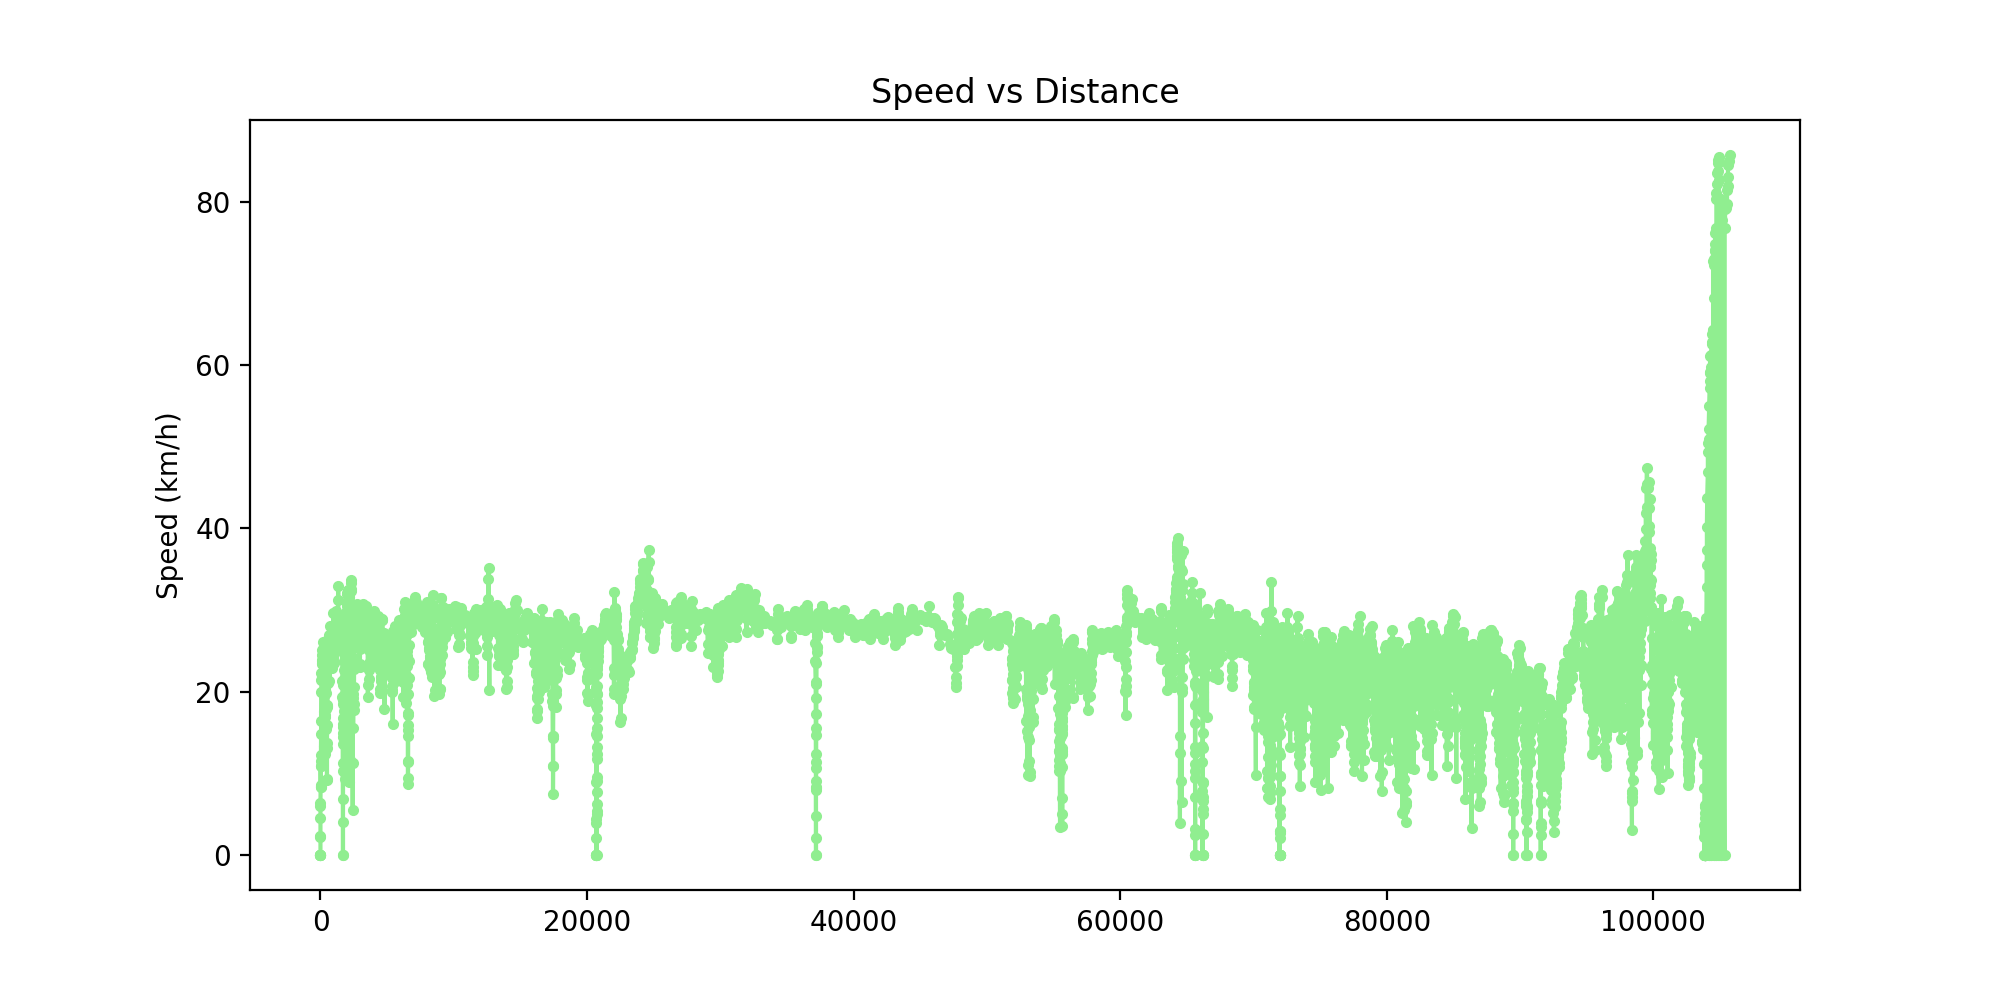

Text(0.5, 1.0, 'Speed vs Distance')

In [18]:
%matplotlib notebook
# We use matplotlib to make a scatter of distance vs speed
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))# set size of figure

### Set the variables ####
x = fietsdata.distance #x-values: column distance
s = fietsdata.speed_kmh #y values: column speed

### Plot the scatter with labels and title ###
plt.plot(x,s,c='lightgreen', marker=".") #make the scatter
plt.ylabel('Speed (km/h)')
plt.title('Speed vs Distance') 

### 4b. Speed, heart rate, cadence and power

<IPython.core.display.Javascript object>


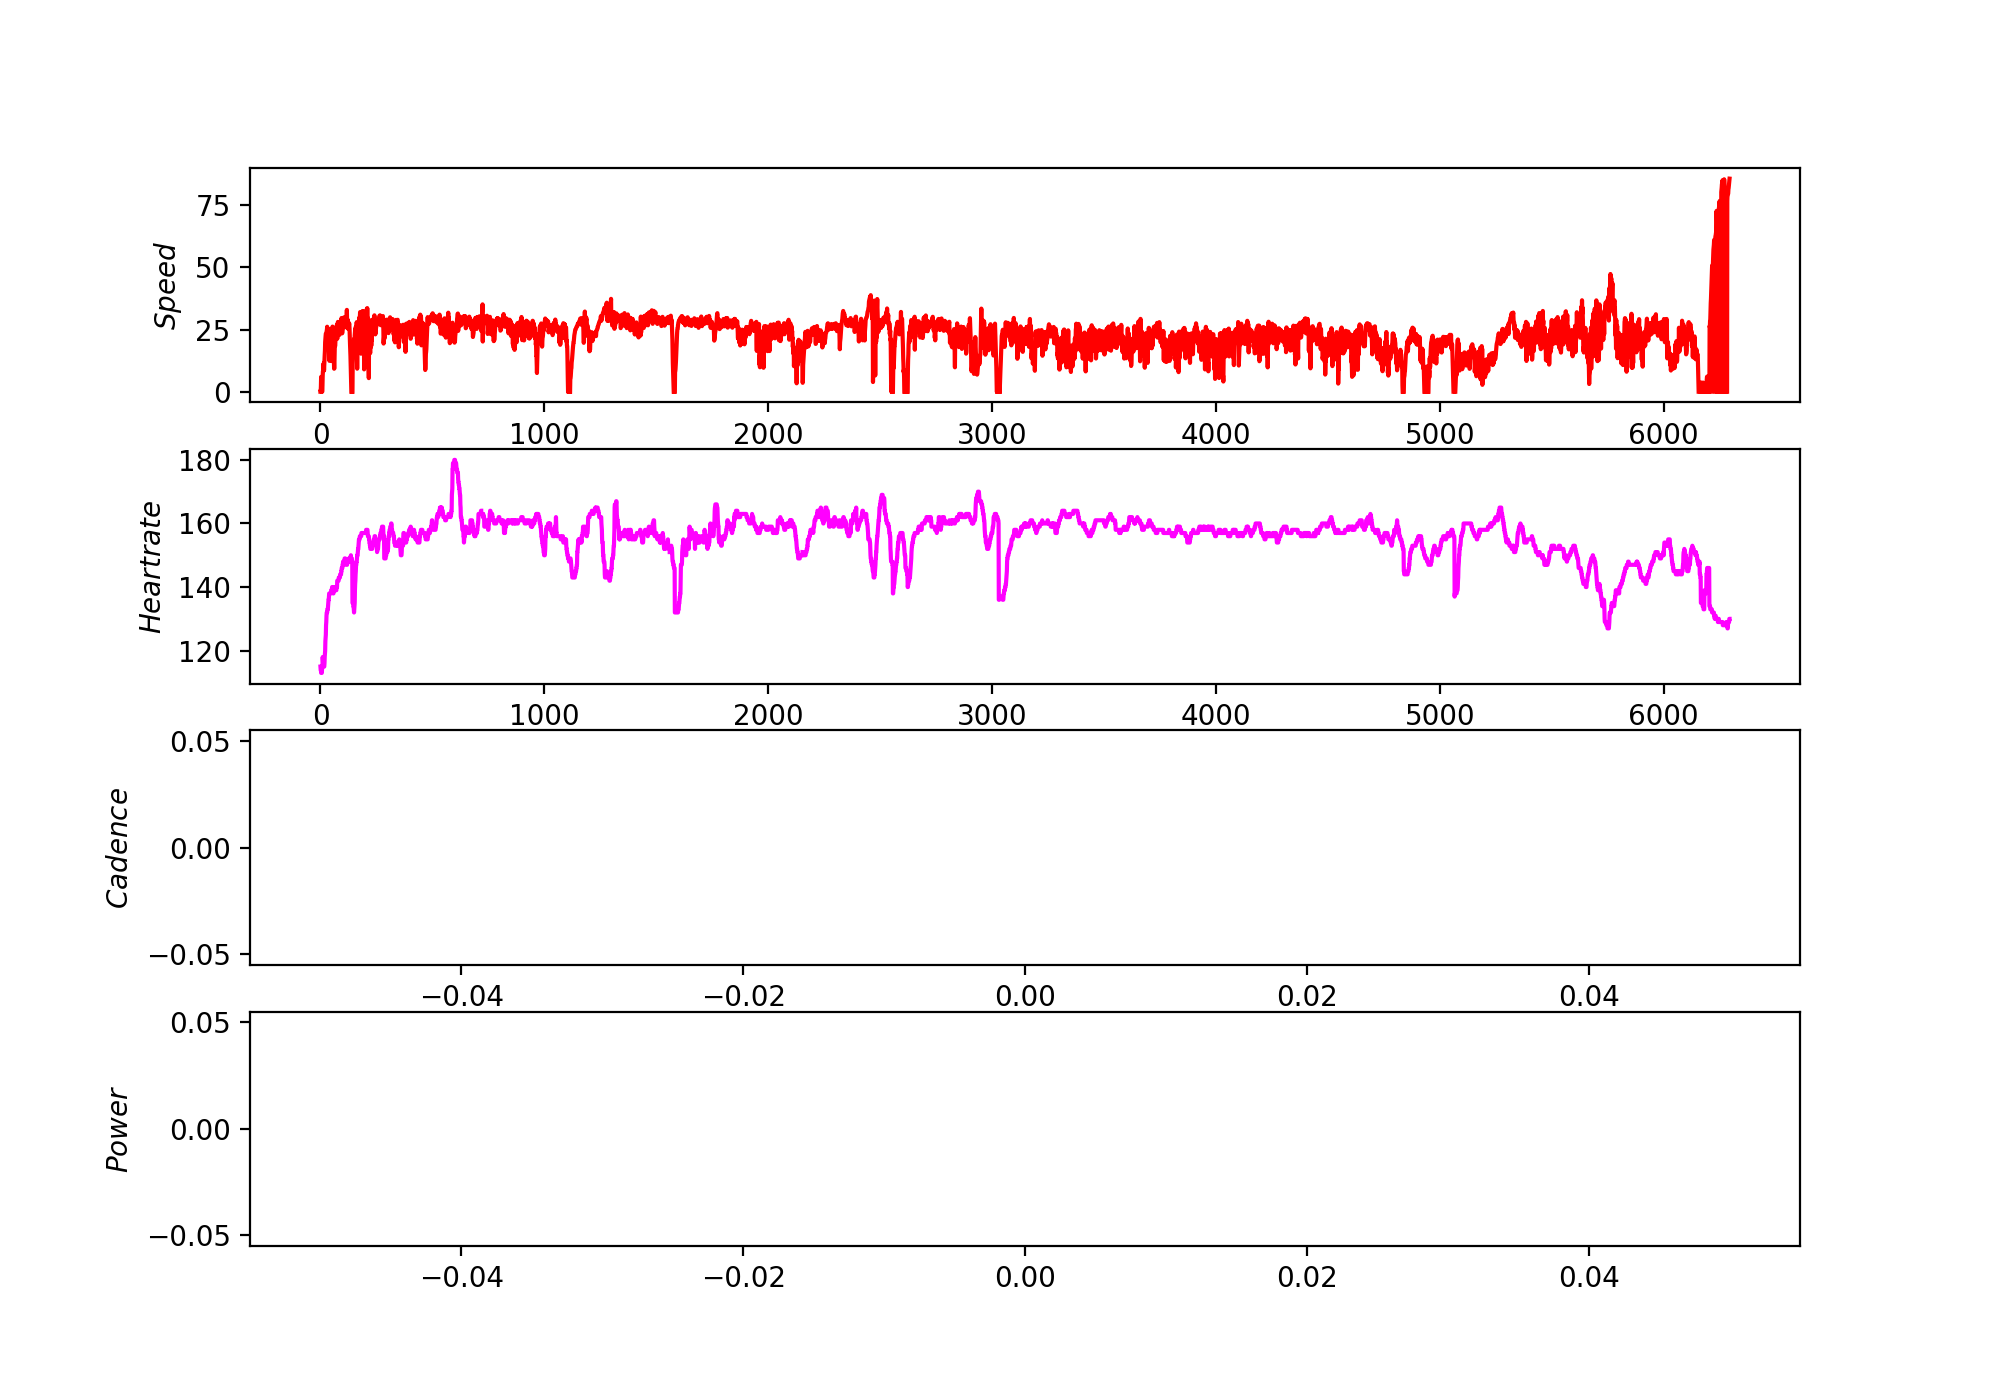

Text(0, 0.5, '$Power$')

In [19]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))#use this to set size of figure

######## write the data to a variable ###########

s = fietsdata.speed_kmh
h = fietsdata.heart_rate
c = fietsdata.cadence
p = fietsdata.power

####### make the subplots ##########
plt.subplot(4,1,1)
plt.plot(s, color='red', linewidth=1.5)
plt.ylabel(r'$Speed$') # y label

plt.subplot(4,1,2)
plt.plot(h, color='magenta', linewidth=1.5)
plt.ylabel(r'$Heartrate$') # y label

plt.subplot(4,1,3) 
plt.plot(c, color='grey', linewidth=1.5)
plt.ylabel(r'$Cadence$') # y label

plt.subplot(4,1,4)
plt.plot(p, color='orange', linewidth=1.5)
plt.ylabel(r'$Power$') # y label

### 4c. Histogram of cadence, bpm and power

<IPython.core.display.Javascript object>


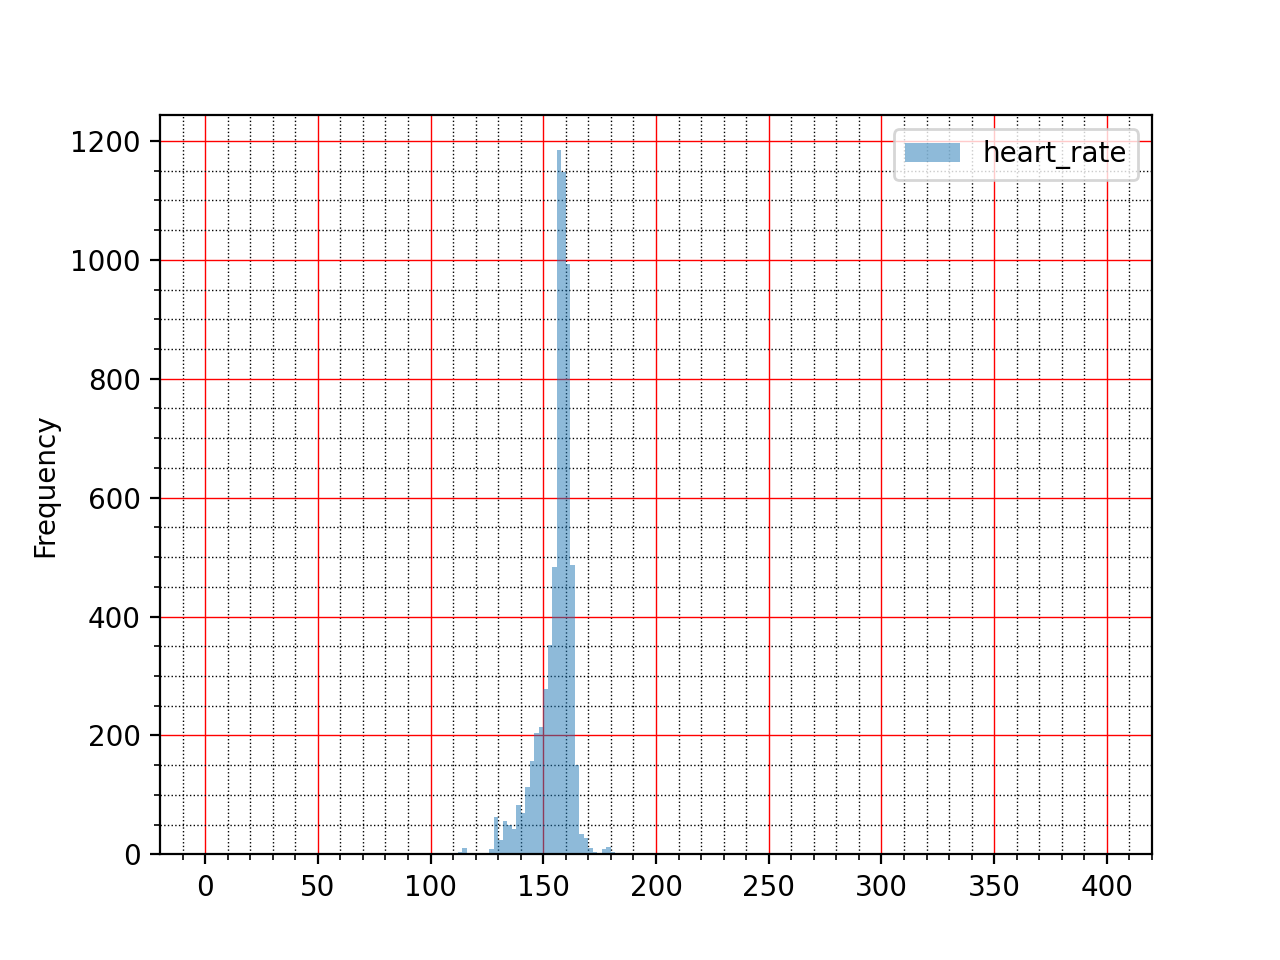

In [20]:
fig, ax = plt.subplots()
fietsdata[['power', 'heart_rate', 'cadence']].plot.hist(bins=200, alpha=0.5, range=(0, 400), ax=ax)
ax.legend()
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## 4d. Speed vs Power

<IPython.core.display.Javascript object>


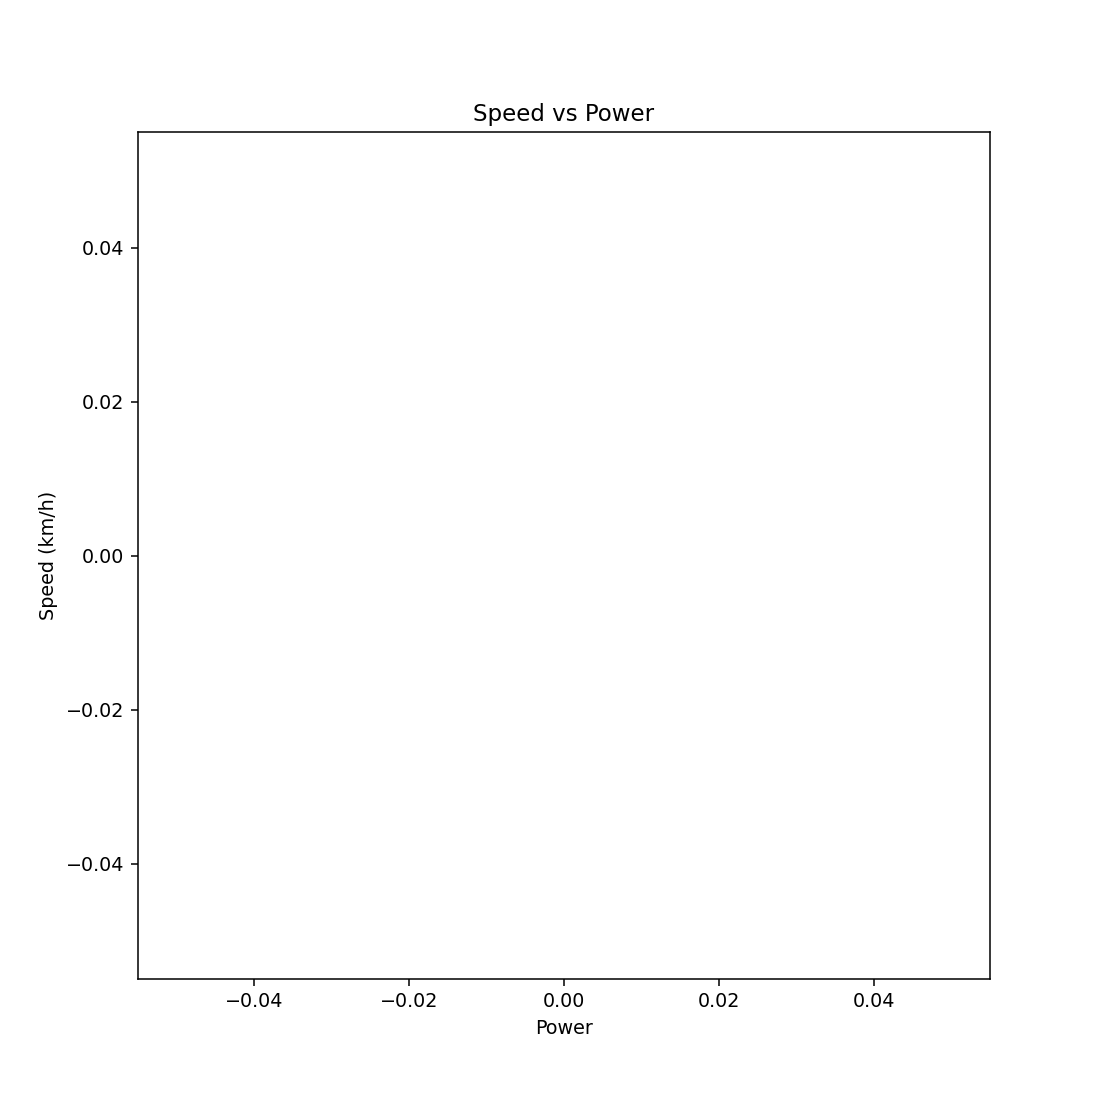

Text(0.5, 1.0, 'Speed vs Power')

In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt
# We use matplotlib to make a scatter of distance vs speed

plt.figure(figsize=(8,8))#use this to set size of figure

### Set the variables ####
s = fietsdata.speed_kmh #y values: column speed
p = fietsdata.power

### Plot the scatter with labels and title ###
plt.plot(p,s) #make the scatter
plt.xlabel('Power')
plt.ylabel('Speed (km/h)')
plt.title('Speed vs Power')
#plt.legend() 

## 5. Some more data analysis

### 5a. Average values

In [35]:
avg_speed= fietsdata["speed_kmh"].mean()
print(f'Your average speed was {round(avg_speed,2)} km/h')

avg_cadence = fietsdata['cadence'].mean()
print(f'Your average cadence was {round(avg_cadence,2)}.')

avg_power = fietsdata['power'].mean()
print(f'Your average power was {round(avg_power,2)} watt')

avg_heart_rate = fietsdata['heart_rate'].mean()
print(f'Your average heartrate was {round(avg_heart_rate,0)} beats/minute')

avg_temp = fietsdata['temperature'].mean()
print(f'The average temperature was {round(avg_temp,0)} degrees Celsius')

Your average speed was 22.78 km/h
Your average cadence was nan.
Your average power was nan watt
Your average heartrate was 155.0 beats/minute
The average temperature was 8.0 degrees Celsius


In [36]:
med_speed= fietsdata["speed_kmh"].median()
text_speed = "Your median speed was {:.1f} km/h."
print(text_speed.format(med_speed))

med_cadence = fietsdata['cadence'].median()
text_cad = "Your median cadence was {:.0f}."
print(text_cad.format(med_cadence))

med_power = fietsdata['power'].median()
text_power = "Your median power was {:.0f} watt."
print(text_power.format(med_power))

med_heart_rate = fietsdata['heart_rate'].median()
text_heart_rate = "Your median heartrate was {:.0f} beats/minute."
print(text_heart_rate.format(med_heart_rate))

med_temp = fietsdata['temperature'].median()
text_temp = "The median temperature was {:.0f} degrees Celsius."
print(text_temp.format(med_temp))

Your median speed was 23.5 km/h.
Your median cadence was nan.
Your median power was nan watt.
Your median heartrate was 157 beats/minute.
The median temperature was 7 degrees Celsius.


/Users/michielbontenbal/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/michielbontenbal/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [37]:
max_speed= fietsdata["speed_kmh"].max()
text_speed = "Your max speed was {:.1f} km/h."
print(text_speed.format(max_speed))

max_cadence= fietsdata["cadence"].max()
text_cadence = "Your max cadence was {:.1f}."
print(text_cadence.format(max_cadence))

max_power = fietsdata['power'].max()
text_power = "Your max power was {:.0f} watt."
print(text_power.format(max_power))

max_heart_rate = fietsdata['heart_rate'].max()
text_heart_rate = "Your max heartrate was {:.0f} beats/minute."
print(text_heart_rate.format(max_heart_rate))

max_temp = fietsdata['temperature'].max()
text_temp = "The max temperature was {:.0f} degrees Celsius."
print(text_temp.format(max_temp))

Your max speed was 85.7 km/h.
Your max cadence was nan.
Your max power was nan watt.
Your max heartrate was 180 beats/minute.
The max temperature was 21 degrees Celsius.


In [38]:
# Show the data in one table

import pandas as pd

tabel2 = pd.DataFrame([ [' ', 'Speed', 'Cadence', 'Power', 'Heart rate', 'Temperature'],
                      ["Average", avg_speed, avg_cadence, avg_power, avg_heart_rate, avg_temp],
                      ["Median", med_speed, med_cadence, med_power, med_heart_rate, med_temp],
                      ["Max", max_speed, '-', max_power, max_heart_rate, max_temp],
                      ])
tabel2.round(1)

,0,1,2,3,4,5
0,,Speed,Cadence,Power,Heart rate,Temperature
1,Average,22.781265,NaN,NaN,155.081094,7.865608
2,Median,23.5368,NaN,NaN,157.0,7.0
3,Max,85.7448,-,NaN,180.0,21


### 5b. Total duration

In [39]:
timetable = (fietsdata['timestamp'])
starttime= timetable.iloc[0]
endtime= timetable.iloc[-1]
#starttijd = timetable.iloc[1,0]
#print(starttijd

duration = endtime-starttime

print("Total duration was: "+ str(duration))

Total duration was: 0 days 04:22:44


## 6. Store the data in json format with date in filename

In [21]:
# Store the dataframe in a json

import pandas as pd
import datetime

filename = datetime.datetime.now().strftime("%Y%m%d")+"fiets.json"
fietsdata.to_json(filename) # it creates a .json file in the astroplant_explorer/learning_stuff folder

#fietsdata.to_json(r'fietsdata.json')

# result: it works but json file is about 8x larger than .fit file.

### 7. Some more data analys: rolling, expanding etc

<IPython.core.display.Javascript object>


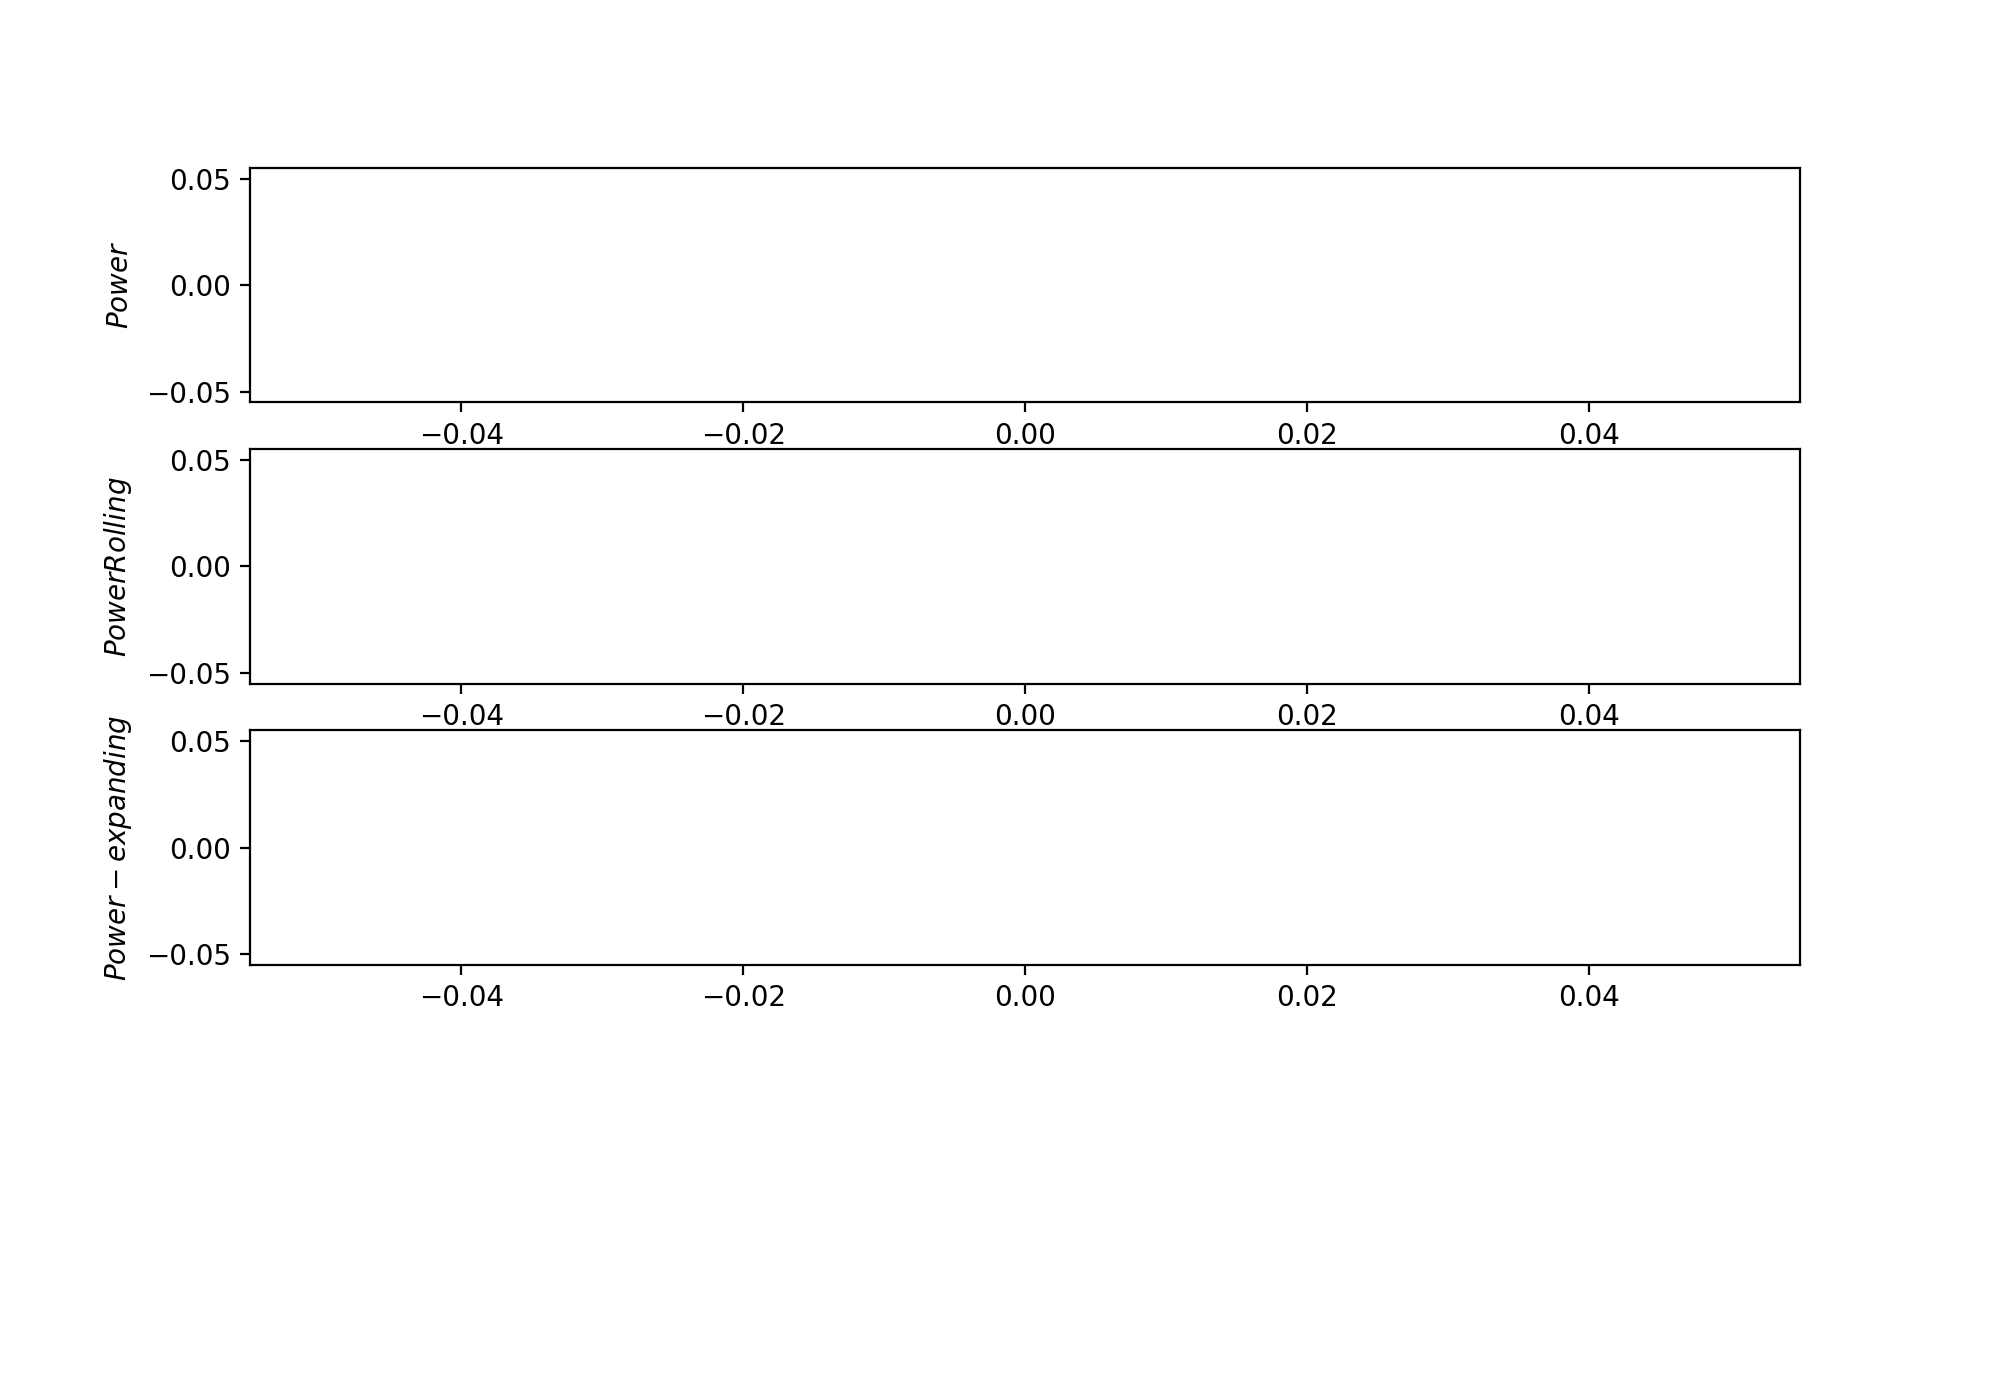

In [40]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))#use this to set size of figure

x = fietsdata.distance #x-values: column distance
p = fietsdata.power
p_roll = fietsdata.power.rolling(60).mean()
p_exp = fietsdata.power.expanding(7).mean()
#############
plt.subplot(4,1,1)
plt.plot(p, color='red', linewidth=1.5)
plt.ylabel(r'$Power$') # y label

plt.subplot(4,1,2)
plt.plot(p_roll, color='magenta', linewidth=1.5)
plt.ylabel(r'$Power Rolling$') # y label

plt.subplot(4,1,3) 
plt.plot(p_exp, color='grey', linewidth=1.5)
plt.ylabel(r'$Power - expanding$') # y label

#plt.subplot(4,1,4)
#plt.plot(p, color='orange', linewidth=1.5)
#plt.ylabel(r'$Power$') # y label

#plt.plot(x,p)
plt.show()